In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./Datasets-Question1/dataset1/Train1.csv", header=None)
tr_labels = df[2].add(0.1).astype(np.int).to_numpy()
tr_data = df[[0,1]].to_numpy()
print(tr_labels.shape)
print(tr_data.shape)


(960,)
(960, 2)


## Data Visualization

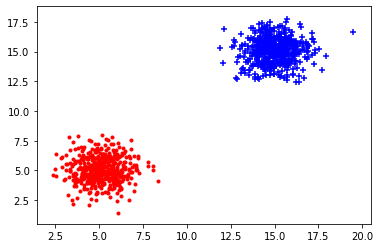

In [3]:
# configuration
color = ['red' , 'blue']
marker = ['.', '+']

ax = plt.axes()

for x , y in zip(tr_data, tr_labels):
    ax.scatter(x[0], x[1], c=color[y], marker=marker[y])

plt.show()

## Perceptron Learning Algorithm

In [4]:
# augmenting the training data
X = np.hstack((np.ones(tr_data.shape[0]).reshape(-1,1), tr_data))
Y = tr_labels*2-1

# print(X)

# initializing the weights
W = np.array([1,1,1], dtype=np.float)

# learning
converged = False
maxiter = 100000
k = 0
while k < maxiter and not converged:
    if k % 100 == 0:
        print("Weights at {}-th update is {}".format(k, W))
    Z = np.multiply(np.dot(X, W), Y)
    converged = True
    for j in np.argwhere(Z <= 0).reshape(-1):
        W = W + Y[j]*X[j]
        k += 1
        converged = False

print("Weights at convergence is {}".format(W))

Weights at 0-th update is [1. 1. 1.]
Weights at 20100-th update is [-9473.          4583.04830854  5429.04118162]
Weights at convergence is [-24265.            572.34931856   2251.64857132]


[2.379340626669688, 19.491365215572255]
[10.171740965900579, 5.822014397855327]


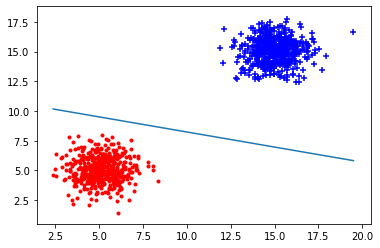

In [5]:
def get_y(x, W):
    return -1 * (W[0] + W[1]*x) / W[2]

# configuration
color = ['red' , 'blue']
marker = ['.', '+']

ax = plt.axes()

for x , y in zip(tr_data, tr_labels):
    ax.scatter(x[0], x[1], c=color[y], marker=marker[y])

    
# drawing line 
# get two points 

x_coord = [np.min(X[:,1]) , np.max(X[:,1])]
y_coord = [get_y(x,W) for x in x_coord]

print(x_coord)
print(y_coord)

ax.plot(x_coord, y_coord)

plt.show()